In [7]:
import numpy as np
import math
import matplotlib.pyplot as plt
from datetime import datetime 
import random

In [8]:
def to_states(ind):
    obs = [0, 0, 0, 0, 0]
    obs[ind] = 1
    return obs
    
def random_walk(start_state, training_size, sequence_size):
    observations = []
    
    for n in range(training_size):
        ins = []
        for i in range(sequence_size):
            obs = []
            ss = start_state
            while ss != 5 and ss != -1:
                obs.append(to_states(ss)) 
                ss += random.choice([-1, 1]) 
            ins.append(obs)
        observations.append(ins)
    
    return observations  

In [15]:
def get_predictions(lam, rw, training_size, sequence_size, alpha):
    
    rsme_list = []
    
    for i in range(training_size):  
        weights = [0.5, 0.5, 0.5, 0.5, 0.5]
        observations = rw[i]
        for j in range(sequence_size):
            obs = observations[j]
            delta_w = 0       
            for t in range(1, len(obs) + 1):
                ind = t - 1
                p_t = np.dot(weights, obs[ind])
                p_tn1 = get_p_tn1(obs, ind, weights)
                discount_delta_w = 0
                for k in range(1, t + 1):
                    temp = np.multiply(lam ** (t - k), obs[k - 1])
                    discount_delta_w = np.add(temp, discount_delta_w)
                dw = np.multiply(alpha * (p_tn1 - p_t), discount_delta_w)
                delta_w += dw
            weights += delta_w
        err = compute_error(weights)
        rsme_list.append(err)
    stdev = np.std(rsme_list, ddof=1)
    se = stdev / math.sqrt(len(rsme_list))
    return weights, np.mean(rsme_list), se

def compute_error(weights):
    expected = np.array([1.0/6, 1.0/3, 1.0/2, 2.0/3, 5.0/6])
    rsme = math.sqrt(np.mean(np.power(np.subtract(weights, expected), 2)))
    return rsme

def get_p_tn1(obs, ind, weights):
    if ind == len(obs) - 1:
        if obs[ind] == [0,0,0,0,1]:
            return 1
        elif obs[ind] == [1,0,0,0,0]:
            return 0
    else:
        return np.dot(weights, obs[ind + 1])

# if __name__ == '__main__':
#     run_exp2()

In [16]:
# def run_exp2():
lams = [i*0.1 for i in range(11)]   #11
alphas = [i*0.05 for i in range(13)]  #13

rsmes = []
training_size = 100
sequence_size = 10
start_state = 2 

rw = random_walk(start_state, training_size, sequence_size)
for lam in lams:
    temp = []
    for alpha in alphas:
        weights, rsme, se = get_predictions(lam, rw, training_size, sequence_size, alpha)
        temp.append(rsme)
        print('at alpha = ', alpha, 'at lambda = ', lam, ' --> rsme = ', rsme, ' | weights = ', weights)
    rsmes.append(temp)

print(rsmes)

# plot different lambdas
#     plt.plot(alphas, rsmes[0], label='$\lambda$ = 0.0')
#     plt.plot(alphas, rsmes[3], label='$\lambda$ = 0.3')
#     plt.plot(alphas, rsmes[8], label='$\lambda$ = 0.8')
#     plt.plot(alphas, rsmes[10], label='$\lambda$ = 1.0')
#     plt.xlabel('$\alpha$')
#     plt.ylabel('Error')
#     plt.grid(True)
#     plt.legend()
#     plt.show()

at alpha =  0.0 at lambda =  0.0  --> rsme =  0.23570226039551584  | weights =  [0.5 0.5 0.5 0.5 0.5]
at alpha =  0.05 at lambda =  0.0  --> rsme =  0.17497187091053598  | weights =  [0.41582152 0.48837154 0.50001911 0.52368254 0.62220807]
at alpha =  0.1 at lambda =  0.0  --> rsme =  0.1310688363131726  | weights =  [0.3545451  0.47053532 0.50515236 0.57014997 0.7005961 ]
at alpha =  0.15000000000000002 at lambda =  0.0  --> rsme =  0.1031055463441581  | weights =  [0.30799791 0.4570769  0.52451468 0.61416667 0.74899455]
at alpha =  0.2 at lambda =  0.0  --> rsme =  0.09087656233820861  | weights =  [0.2720768  0.44948659 0.56403021 0.6414761  0.7774848 ]
at alpha =  0.25 at lambda =  0.0  --> rsme =  0.09438205753071756  | weights =  [0.2444458  0.44590759 0.62934875 0.64257812 0.79382324]
at alpha =  0.30000000000000004 at lambda =  0.0  --> rsme =  0.11365470244006945  | weights =  [0.2231117  0.44297867 0.72982119 0.6090967  0.8045537 ]
at alpha =  0.35000000000000003 at lambda = 

at alpha =  0.30000000000000004 at lambda =  0.4  --> rsme =  0.12335109040924198  | weights =  [0.22829402 0.51155465 0.73302655 0.60564176 0.81575188]
at alpha =  0.35000000000000003 at lambda =  0.4  --> rsme =  0.14481821161561803  | weights =  [0.20651431 0.53858026 0.82126032 0.55904415 0.81059641]
at alpha =  0.4 at lambda =  0.4  --> rsme =  0.17195712693337697  | weights =  [0.18441051 0.56826543 0.93625398 0.48689877 0.80319087]
at alpha =  0.45 at lambda =  0.4  --> rsme =  0.2133360963809753  | weights =  [0.16096295 0.60254289 1.07801655 0.39085387 0.79857523]
at alpha =  0.5 at lambda =  0.4  --> rsme =  0.28184333578057535  | weights =  [0.13572371 0.65033489 1.23040147 0.27960195 0.80288284]
at alpha =  0.55 at lambda =  0.4  --> rsme =  0.4058554343074473  | weights =  [0.10882633 0.73113661 1.35208342 0.17106684 0.82358979]
at alpha =  0.6000000000000001 at lambda =  0.4  --> rsme =  0.6478238613317485  | weights =  [0.08100207 0.87665876 1.37237391 0.09210571 0.86906

at alpha =  0.5 at lambda =  0.8  --> rsme =  0.3704893604064167  | weights =  [0.13130095 0.83105377 1.4529788  0.54813617 0.81937982]
at alpha =  0.55 at lambda =  0.8  --> rsme =  0.46346371848592577  | weights =  [0.09973257 0.85908479 1.68397283 0.46983993 0.80223382]
at alpha =  0.6000000000000001 at lambda =  0.8  --> rsme =  0.6767694995466718  | weights =  [0.0745997  0.88508194 1.91825667 0.38285228 0.79195676]
at alpha =  0.0 at lambda =  0.9  --> rsme =  0.23570226039551584  | weights =  [0.5 0.5 0.5 0.5 0.5]
at alpha =  0.05 at lambda =  0.9  --> rsme =  0.15534249661117963  | weights =  [0.45938927 0.53887999 0.60606342 0.66630474 0.65543101]
at alpha =  0.1 at lambda =  0.9  --> rsme =  0.1422843510993928  | weights =  [0.43159955 0.58591236 0.6960436  0.75347198 0.76583714]
at alpha =  0.15000000000000002 at lambda =  0.9  --> rsme =  0.16315971740343538  | weights =  [0.40615392 0.62780229 0.79493443 0.80403112 0.84042993]
at alpha =  0.2 at lambda =  0.9  --> rsme =  

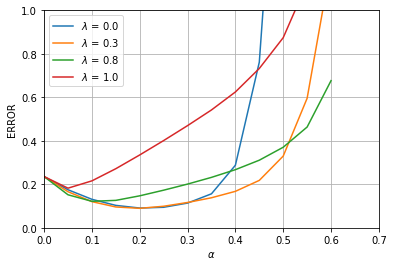

In [27]:
# plot different lambdas
plt.plot(alphas, rsmes[0], label=r'$\lambda$ = 0.0')
plt.plot(alphas, rsmes[3], label=r'$\lambda$ = 0.3')
plt.plot(alphas, rsmes[8], label=r'$\lambda$ = 0.8')
plt.plot(alphas, rsmes[10], label=r'$\lambda$ = 1.0')
plt.xlabel(r'$\alpha$')
plt.ylabel('ERROR')
plt.xlim(0, 0.7) 
plt.ylim(0, 1.0) 
plt.grid(True)
plt.legend()
plt.show()